In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Taller semana 10

In [6]:
#Creamos la conexion
conexion = sqlite3.connect('punto_venta.db')
curso = conexion.cursor()

In [9]:
#Consultamos la tabla de ventas
df_ventas = pd.read_sql_query('SELECT monto,total_productos FROM ventas', conexion)
df_ventas.head(10)

,monto,total_productos
0,44.0,1
1,44.0,1
2,44.0,1
3,134.0,2
4,67.0,1
5,201.0,3
6,48.0,1
7,96.0,2
8,144.0,3
9,192.0,4


In [10]:
#agg es para crear funciones de maximo, minimo y suma
df_ventas.agg(['sum','min','max'])

,monto,total_productos
sum,1254.0,24
min,44.0,1
max,240.0,5


In [13]:
# Creo un diccionario para especificar que operaciones se realizan por columna
df_ventas.agg({'monto':['sum','min','max'], 'total_productos':['min','max']})

,monto,total_productos
sum,1254.0,NaN
min,44.0,1.0
max,240.0,5.0


In [14]:
df_prod = pd.read_sql_query("SELECT precio,stock_inv,stock_maximo,stock_minimo FROM productos;", conexion)
df_prod.head()

,precio,stock_inv,stock_maximo,stock_minimo
0,23.0,35,200,10
1,67.0,78,200,10
2,28.0,6,200,10
3,44.0,7,200,10
4,48.0,8,200,10


In [15]:
df_prod.agg({'precio':['sum','min','max'], 'stock_inv':['min','max'], 'stock_maximo':['max'],'stock_minimo':['min']})

,precio,stock_inv,stock_maximo,stock_minimo
sum,361.0,NaN,NaN,NaN
min,14.0,6.0,NaN,10.0
max,67.0,137.0,200.0,NaN


In [16]:
#De una forma mas sencilla nos muestra las operaciones de todas las columnas
df_prod.agg(['sum','min','max'])

,precio,stock_inv,stock_maximo,stock_minimo
sum,361.0,572,2000,100
min,14.0,6,200,10
max,67.0,137,200,10


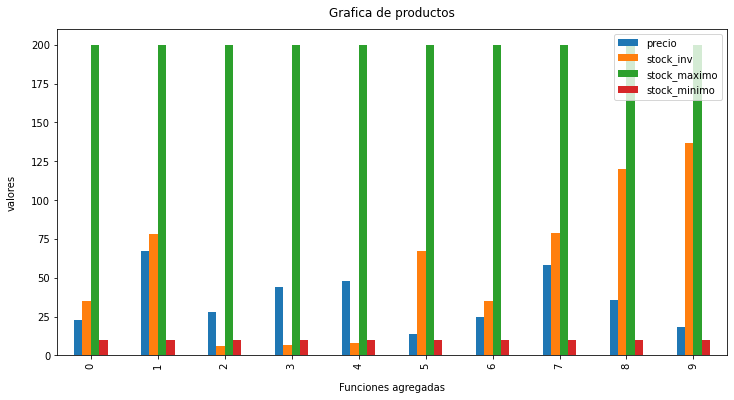

In [19]:
df_prod.plot(kind='bar', figsize=(12,6))
plt.xlabel("Funciones agregadas", labelpad=14)
plt.ylabel("valores", labelpad=14)
plt.title('Grafica de productos', y=1.02)
plt.savefig('grafica producto.png')

In [20]:
#Cerrar nuetra conexión
conexion.close()